## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
X_train = pd.read_csv("/Users/snoopy/GitHub/LHL-Project-3-Midterm-Project/notebooks/processed/X_train.csv")
y_train = pd.read_csv("/Users/snoopy/GitHub/LHL-Project-3-Midterm-Project/notebooks/processed/y_train.csv")

# Convert date columns to datetime and create "days on market" feature
X_train["list_date"] = pd.to_datetime(X_train["list_date"], errors="coerce").dt.tz_localize(None)
X_train["sold_date"] = pd.to_datetime(X_train["sold_date"], errors="coerce").dt.tz_localize(None)
X_train["days_on_market"] = (X_train["sold_date"] - X_train["list_date"]).dt.days

# Drop unnecessary columns
X_train_cleaned = X_train.drop(columns=["property_id", "address", "list_date", "sold_date"])

# Replace 'Unknown' values in categorical columns with NaN and fill with mode
categorical_cols = ["status", "type", "city", "state"]
for col in categorical_cols:
    X_train_cleaned[col] = X_train_cleaned[col].astype(str).replace("Unknown", pd.NA)
    X_train_cleaned[col].fillna(X_train_cleaned[col].mode()[0], inplace=True)

# Ensure all values are strings before encoding
for col in categorical_cols:
    X_train_cleaned[col] = X_train_cleaned[col].astype(str)

# One-hot encode categorical variables
X_train_cleaned = pd.get_dummies(X_train_cleaned, columns=categorical_cols, drop_first=True)

# Handle missing values
X_train_cleaned.fillna(X_train_cleaned.select_dtypes(include=['number']).median(), inplace=True)

# Remove any remaining non-numeric values
X_train_cleaned = X_train_cleaned.apply(pd.to_numeric, errors='coerce')
X_train_cleaned.dropna(inplace=True)

# Ensure y_train matches the cleaned X_train
y_train = y_train.loc[X_train_cleaned.index]

# Convert target variable to numeric and flatten to 1D array
y_train = y_train.apply(pd.to_numeric, errors='coerce').values.ravel()

# Debugging: Print dataset shapes
print("X_train_cleaned shape:", X_train_cleaned.shape)
print("y_train shape:", y_train.shape)

# Train-test split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_cleaned, y_train, test_size=0.2, random_state=42)

# Debugging: Print split shapes
print("Training set shape:", X_train_split.shape, y_train_split.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


X_train_cleaned shape: (4090, 112)
y_train shape: (4090,)
Training set shape: (3272, 112) (3272,)
Validation set shape: (818, 112) (818,)
Mean Squared Error: 0.004976686852610504
R-squared: 0.9908702910930688


### Model Exploration and Evaluation 

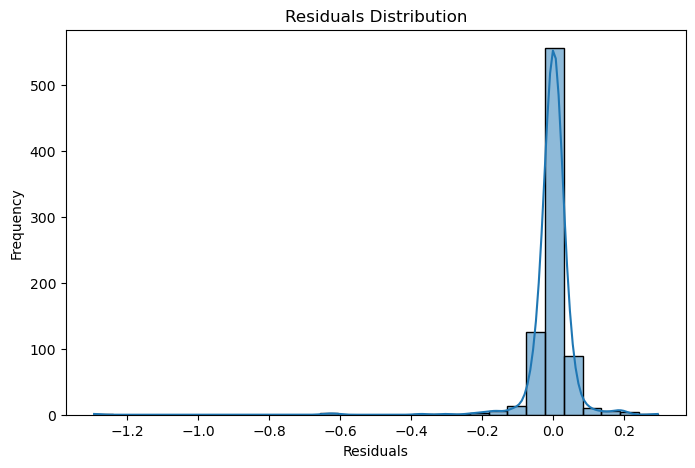

/var/folders/x6/k6smyqdj3lg6qmw8y7wds1jc0000gn/T/ipykernel_11218/1572445875.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--r', color='red')  # Line of perfect fit


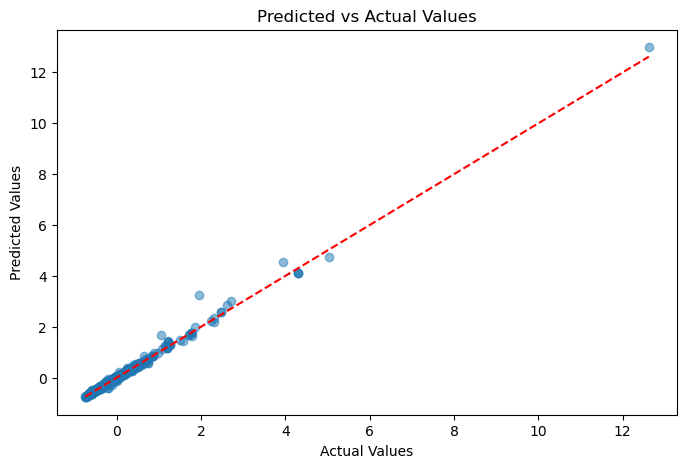

Mean Squared Error (MSE): 0.004976686852610504
Root Mean Squared Error (RMSE): 0.07054563666599448
R-squared (R²): 0.9908702910930688


In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Compute residuals
residuals = y_val - y_pred

# Plot residuals distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--r', color='red')  # Line of perfect fit
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


In [21]:
!git clone https://github.com/CuHzQuixote/Supervised-learning/tree/main/notebooks

Cloning into 'notebooks'...
fatal: repository 'https://github.com/CuHzQuixote/Supervised-learning/tree/main/notebooks/' not found


In [92]:
import pandas as pd

y_train = pd.Series(y_train)  # Convert to a Pandas Series
print(y_train.unique())  # Now it should work

[-2.68521348e-01 -5.52466487e-01  1.29363559e-01 -3.51715465e-01
 -2.24211438e-01 -1.60007283e-01 -4.63846667e-01  4.27777239e-01
  2.98923319e-02  2.92134657e-01 -2.79372755e-01 -5.44327932e-01
  2.30868771e+00 -1.87137608e-01 -2.17881451e-01  6.60636871e-02
 -5.81403571e-01 -6.23000629e-01  8.67259205e-01 -3.54428317e-01
 -3.95121092e-01  2.58295869e-03 -3.58949736e-01 -2.59478510e-01
 -3.34075397e-02 -5.94967829e-01 -4.13387626e-01 -7.28440130e-01
 -2.10647180e-01 -2.43647009e-02  7.51065259e-02 -3.22778381e-01
 -2.73042768e-01 -1.32878767e-01 -1.05750250e-01 -3.67992575e-01
 -5.30763674e-01 -7.86217337e-02 -1.10271670e-01 -1.96178638e-01
 -4.89166615e-01  1.18066543e-02 -2.37775697e-01 -3.31821220e-01
 -1.61996707e-01  6.17676854e-01 -4.31292447e-01  8.45556391e-01
 -3.18437819e-01  4.44054349e-01 -1.87135799e-01 -5.05443725e-01
 -2.77564187e-01 -1.23835928e-01 -4.53899544e-01 -2.45009968e-01
 -4.59506104e-01  1.54237898e-02 -1.14793089e-01 -3.86078253e-01
  2.28834785e-01  5.05771

In [93]:
print(X_train.dtypes)

property_id                int64
status                    object
list_date         datetime64[ns]
list_price               float64
sold_date         datetime64[ns]
year_built               float64
beds                     float64
baths                    float64
sqft                     float64
lot_sqft                 float64
garage                   float64
type                      object
address                   object
city                      object
state                     object
postal_code                int64
latitude                  object
longitude                 object
log_sold_price           float64
days_on_market           float64
dtype: object


In [94]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ["status", "type"]  # Columns that need encoding

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns & merge encoded ones
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

print("Final X_train shape:", X_train.shape)


Final X_train shape: (4104, 26)


In [97]:
import xgboost as xgb

# Initialize DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    "objective": "reg:squarederror",  # Use squared error for regression
    "eval_metric": "rmse"
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5  # Root Mean Squared Error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Results:")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  MAE: {mae_xgb:.2f}")
print(f"  R² Score: {r2_xgb:.4f}")


XGBoostError: [15:34:00] /Users/runner/work/xgboost/xgboost/src/data/data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (4090 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001ae4b5605 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x00000001ae676737 xgboost::MetaInfo::SetInfoFromHost(xgboost::Context const&, xgboost::StringView, xgboost::Json) + 3799
  [bt] (2) 3   libxgboost.dylib                    0x00000001ae675750 xgboost::MetaInfo::SetInfo(xgboost::Context const&, xgboost::StringView, xgboost::StringView) + 496
  [bt] (3) 4   libxgboost.dylib                    0x00000001ae4cc04c XGDMatrixSetInfoFromInterface + 236
  [bt] (4) 5   libffi.8.dylib                      0x000000010b785d92 ffi_call_unix64 + 82
  [bt] (5) 6   ???                                 0x00007ff7b5f20f70 0x0 + 140701886189424



Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [ ]:
# gather evaluation metrics and compare results

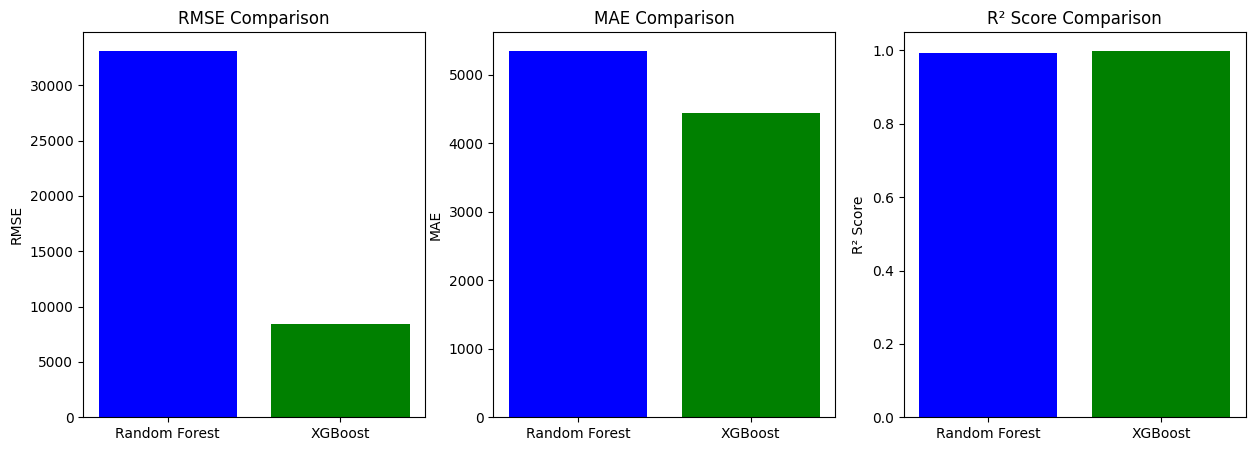

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Random Forest", "XGBoost"]
rmse_scores = [rmse_rf, rmse_xgb]
mae_scores = [mae_rf, mae_xgb]
r2_scores = [r2_rf, r2_xgb]

# Plot comparison
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# RMSE Comparison
ax[0].bar(models, rmse_scores, color=['blue', 'green'])
ax[0].set_title("RMSE Comparison")
ax[0].set_ylabel("RMSE")

# MAE Comparison
ax[1].bar(models, mae_scores, color=['blue', 'green'])
ax[1].set_title("MAE Comparison")
ax[1].set_ylabel("MAE")

# R2 Score Comparison
ax[2].bar(models, r2_scores, color=['blue', 'green'])
ax[2].set_title("R² Score Comparison")
ax[2].set_ylabel("R² Score")

plt.show()


## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable.



In [ ]:
# perform feature selection
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)